# Open and visualize the data

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
PATH_CSV="/Users/iris/Documents/radar_deep/Radar_Traffic_Counts.csv"

In [49]:
df=pd.read_csv(PATH_CSV,parse_dates={"global_date":[3,4,5,9]},keep_date_col=True)

In [50]:
df.head()

,global_date,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Time Bin,Direction,Volume
0,2018-01-23 22:15:00,2021 BLK KINNEY AVE (NW 300ft NW of Lamar),30.248691,-97.770409,2018,1,23,2,22,15,22:15,None,4
1,2017-12-16 19:45:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.785660,2017,12,16,6,19,45,19:45,NB,103
2,2018-01-23 21:45:00,400 BLK AZIE MORTON RD (South of Barton Spring...,30.264245,-97.765802,2018,1,23,2,21,45,21:45,SB,44
3,2018-01-23 21:45:00,400 BLK AZIE MORTON RD (South of Barton Spring...,30.264245,-97.765802,2018,1,23,2,21,45,21:45,NB,13
4,2018-01-23 22:15:00,2021 BLK KINNEY AVE (NW 300ft NW of Lamar),30.248691,-97.770409,2018,1,23,2,22,15,22:15,None,0


In [5]:
#df["datetime_time"]=df.apply(lambda x: datetime.datetime(x.Year,x.Month,x.Day,x.Hour,x.Minute),axis=1)

In [6]:
df.columns

Index(['location_name', 'location_latitude', 'location_longitude', 'Year',
       'Month', 'Day', 'Day of Week', 'Hour', 'Minute', 'Time Bin',
       'Direction', 'Volume'],
      dtype='object')

In [7]:
df["Time Bin"].unique()[:10]

array(['2020-11-23T22:15:00.000000000', '2020-11-23T19:45:00.000000000',
       '2020-11-23T21:45:00.000000000', '2020-11-23T19:30:00.000000000',
       '2020-11-23T22:00:00.000000000', '2020-11-23T21:00:00.000000000',
       '2020-11-23T22:30:00.000000000', '2020-11-23T22:45:00.000000000',
       '2020-11-23T23:00:00.000000000', '2020-11-23T10:45:00.000000000'],
      dtype='datetime64[ns]')

In [28]:
print(df['location_name'].unique().shape)
radar1=df['location_name'].unique()[1]

(23,)


In [29]:
radar1

' CAPITAL OF TEXAS HWY / LAKEWOOD DR'

In [30]:
df[["Day","Month","Year"]][df['location_name']==radar1] #we can seet we have data for each 

,Day,Month,Year
1,16,12,2017-01-01
26,16,12,2017-01-01
27,16,12,2017-01-01
35,23,1,2018-01-01
36,23,1,2018-01-01
...,...,...,...
4603784,27,5,2019-01-01
4603801,25,5,2019-01-01
4603818,21,5,2019-01-01
4603821,20,5,2019-01-01


In [56]:
df["global_date"][df['location_name']==radar1].unique()

array(['2017-12-16T19:45:00.000000000', '2017-12-16T19:30:00.000000000',
       '2018-01-23T22:15:00.000000000', ...,
       '2019-05-07T23:45:00.000000000', '2019-05-07T23:30:00.000000000',
       '2019-05-07T23:15:00.000000000'], dtype='datetime64[ns]')

In [51]:
sub_df=df[(df['location_name']==radar1)]

In [52]:
sub_df["Direction"].unique()

array(['NB', 'SB'], dtype=object)

In [14]:
datetime.date(2018,1,23)

datetime.date(2018, 1, 23)

In [63]:
print(type(sub_df["global_date"].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [57]:
select_date=pd.Timestamp(year=2018,month=1,day=23,unit="D").date()

In [58]:
print(select_date)

2018-01-23


In [22]:
sub_df.rename({"Time Bin":"date"})

,Time Bin,Direction,Volume
0,2020-11-23 22:15:00,None,4
4,2020-11-23 22:15:00,None,0
21,2020-11-23 22:15:00,None,3
67,2020-11-23 22:00:00,None,4
68,2020-11-23 22:00:00,None,1
...,...,...,...
1483732,2020-11-23 10:45:00,None,5
1483821,2020-11-23 10:30:00,None,12
1483822,2020-11-23 10:30:00,None,2
1483823,2020-11-23 10:30:00,None,5


In [53]:
sub_df

,global_date,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Time Bin,Direction,Volume
1,2017-12-16 19:45:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,12,16,6,19,45,19:45,NB,103
26,2017-12-16 19:30:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,12,16,6,19,30,19:30,NB,136
27,2017-12-16 19:30:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,12,16,6,19,30,19:30,NB,106
35,2018-01-23 22:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2018,1,23,2,22,15,22:15,NB,58
36,2018-01-23 22:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2018,1,23,2,22,15,22:15,NB,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603784,2019-05-27 18:00:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,5,27,1,18,0,18:00,SB,80
4603801,2019-05-25 04:45:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,5,25,6,4,45,04:45,NB,2
4603818,2019-05-21 13:00:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,5,21,2,13,0,13:00,SB,2
4603821,2019-05-20 15:00:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,5,20,1,15,0,15:00,SB,175


In [59]:
s2=sub_df[sub_df.apply(lambda x: x["global_date"].date())]
s2[s2["global_date"]==select_date]

KeyError: 'global_date'

In [66]:
sub_df[(sub_df["Direction"]=="NB")|(sub_df["Year"]==2018)].sort_values("global_date")

,global_date,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Time Bin,Direction,Volume
1541335,2017-09-03 02:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,9,02:15,NB,9
1541334,2017-09-03 02:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,9,02:15,NB,14
1541281,2017-09-03 02:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,15,02:15,NB,3
1541280,2017-09-03 02:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,15,02:15,NB,11
1541214,2017-09-03 02:30:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,30,02:30,NB,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595389,2019-11-12 11:00:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,11,12,2,11,0,11:00,NB,106
3518310,2019-11-12 11:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,11,12,2,11,15,11:15,NB,117
3595355,2019-11-12 11:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,11,12,2,11,15,11:15,NB,135
3595282,2019-11-12 11:30:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,11,12,2,11,30,11:30,NB,184


In [68]:
sub_df2018=sub_df[(sub_df["Direction"]=="NB")|(sub_df["Year"]==2018)]

In [113]:
sub_df2018.sort_values("global_date")

,global_date,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Time Bin,Direction,Volume
1541335,2017-09-03 02:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,9,02:15,NB,9
1541334,2017-09-03 02:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,9,02:15,NB,14
1541281,2017-09-03 02:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,15,02:15,NB,3
1541280,2017-09-03 02:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,15,02:15,NB,11
1541214,2017-09-03 02:30:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2017,9,3,0,2,30,02:30,NB,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595389,2019-11-12 11:00:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,11,12,2,11,0,11:00,NB,106
3518310,2019-11-12 11:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,11,12,2,11,15,11:15,NB,117
3595355,2019-11-12 11:15:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,11,12,2,11,15,11:15,NB,135
3595282,2019-11-12 11:30:00,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.78566,2019,11,12,2,11,30,11:30,NB,184


In [115]:
final_df=sub_df2018.groupby("global_date").agg({"Volume":"sum"}).sort_values("global_date").reset_index()

In [104]:
# It seems that some radar has collect data with no direction ...


In [109]:
mean_df=sub_df2018.groupby("Day of Week").agg({"Volume":"mean"}).sort_values("Day of Week").reset_index()

<AxesSubplot:title={'center':'Mean Volume aggregate by the day of the week over the year 2018'}, xlabel='Day of Week'>

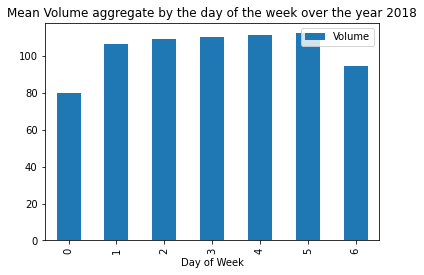

In [111]:
mean_df.plot(x="Day of Week",y="Volume",kind="bar",title="Mean volume aggregate by the day of the week over the year 2018")

In [105]:
final_df

,global_date,Volume
0,2017-09-03 02:15:00,37
1,2017-09-03 02:30:00,18
2,2017-09-03 02:45:00,14
3,2017-09-03 03:00:00,13
4,2017-09-03 03:15:00,19
...,...,...
63642,2019-11-12 10:30:00,254
63643,2019-11-12 10:45:00,237
63644,2019-11-12 11:00:00,264
63645,2019-11-12 11:15:00,252


In [93]:
final_df.columns

Index(['global_date', 'Volume'], dtype='object')

0 96
96 192
192 288
288 384
384 480
480 576
576 672


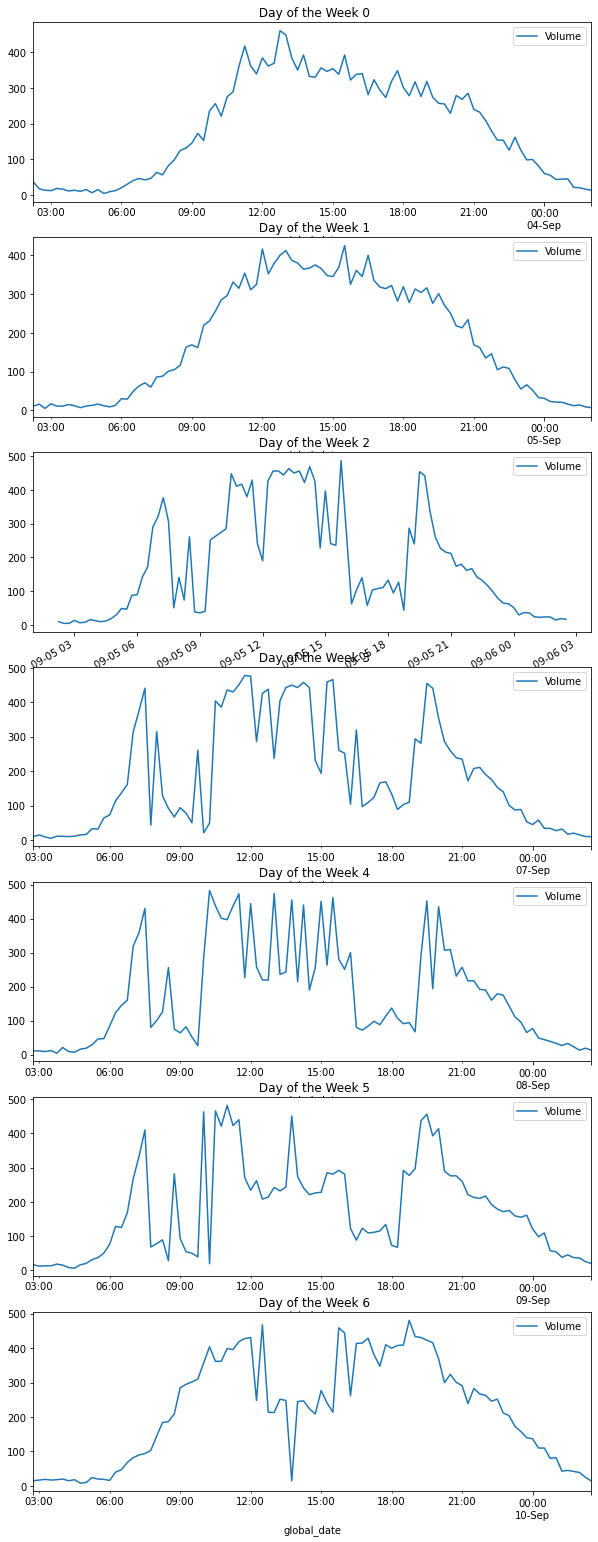

In [107]:
fig,ax=plt.subplots(7,1,figsize=(10,30))
for i in range(7):
    print(i*24*4,(i+1)*24*4)
    temp_df=final_df.iloc[i*24*4:(i+1)*24*4]
    temp_df.plot("global_date","Volume",ax=ax[i],title=" Day of the Week {}".format(i))

In [88]:
final_df["exact_day"]=final_df["global_date"].date()

AttributeError: 'Series' object has no attribute 'date'

<AxesSubplot:xlabel='global_date'>

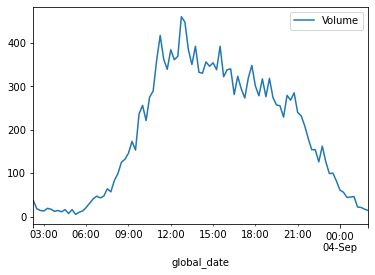

In [86]:
final_df.plot("global_date","Volume")

In [ ]:
sub_df[(sub_df["Direction"]=="SB")|(sub_df["Hour"]==21)]

In [ ]:
sub_df[(sub_df["Direction"]=="SB")].plot(x="Time Bin",y="Volume")